# 1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [5]:
!python -m spacy download en_core_web_md

2022-08-26 22:01:02.691651: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-26 22:01:02.691686: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-26 22:01:05.472013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-26 22:01:05.472036: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 22:01:05.474972: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: user
2022-08-26 22:01:05.475030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: user
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Anjana\anaconda3\lib\site-packages\pip\_vendor\urllib3\res

In [6]:
import spacy

In [7]:
spacy.load('en_core_web_md')

In [8]:
!pip install wordcloud 

In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
nlp=spacy.load('en_core_web_md')

In [12]:
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2022-08-26 22:05:22.491216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-26 22:05:22.491251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-26 22:05:25.098091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-26 22:05:25.098112: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 22:05:25.100266: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: user
2022-08-26 22:05:25.100310: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: user
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Anjana\anaconda3\lib\site-packages\pip\_vendor\urllib3\res

In [13]:
data=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Text Mining\\Elon_musk.csv",encoding='latin1')

In [14]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [15]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
len(data)

1999

In [17]:
# remove both the leading and the trailing spaces
tweets = [x.strip() for x in data["Text"]]
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [18]:
# removes empty strings, because they are considered in Python as False
tweets=[x for x in tweets if x]

In [19]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [20]:
# Joining the list into one string/text
tweets_join=' '.join(tweets)

In [21]:
tweets_join

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [22]:
#punctuation
nopuctn_tweets=tweets_join.translate(str.maketrans('','',string.punctuation))

In [23]:
nopuctn_tweets

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anjana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#Tokenization
from nltk.tokenize import word_tokenize
tweets_tokens = word_tokenize(nopuctn_tweets)
print(tweets_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [26]:
len(tweets_tokens)

21078

In [27]:
#Normalize the data
lower_words = [x.lower() for x in tweets_tokens]
print(lower_words[0:50])

['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'httpstco9wfkmyu2oj', 'frodo']


In [28]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
no_stop_words=[x for x in lower_words if x not in stop_words]

In [31]:
print(no_stop_words)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u

In [32]:
len(no_stop_words)

14882

In [33]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [34]:
stemmed_tokens = [ps.stem(word) for word in no_stop_words]
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'givedirectli', 'sent', 'agre', 'clubhous', 'kanyewest', 'httpstco3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'true', 'power', 'haha', 'httpstcofc9uhqsd7o', 'freewall

In [35]:
for w in no_stop_words:
    print(w, " : ", ps.stem(w))

kunalb11  :  kunalb11
im  :  im
alien  :  alien
idaacarmack  :  idaacarmack
ray  :  ray
tracing  :  trace
cyberpunk  :  cyberpunk
hdr  :  hdr
nextlevel  :  nextlevel
tried  :  tri
joerogan  :  joerogan
spotify  :  spotifi
great  :  great
interview  :  interview
gtera27  :  gtera27
doge  :  doge
underestimated  :  underestim
teslacn  :  teslacn
congratulations  :  congratul
tesla  :  tesla
china  :  china
amazing  :  amaz
execution  :  execut
last  :  last
year  :  year
next  :  next
even  :  even
happy  :  happi
new  :  new
year  :  year
ox  :  ox
httpstco9wfkmyu2oj  :  httpstco9wfkmyu2oj
frodo  :  frodo
underdoge  :  underdog
thought  :  thought
would  :  would
fail  :  fail
httpstcozgxjfdzzrm  :  httpstcozgxjfdzzrm
owensparks  :  owenspark
flcnhvy  :  flcnhvi
anonyx10  :  anonyx10
haha  :  haha
thanks  :  thank
flcnhvy  :  flcnhvi
anonyx10  :  anonyx10
indeed  :  inde
tweets  :  tweet
definitely  :  definit
represent  :  repres
realworld  :  realworld
time  :  time
allocation  :  a

companies  :  compani
make  :  make
goods  :  good
amp  :  amp
produce  :  produc
services  :  servic
love  :  love
engineersfeed  :  engineersfe
earth  :  earth
small  :  small
amp  :  amp
smaller  :  smaller
still  :  still
httpstcogtohclgj82  :  httpstcogtohclgj82
gamespot  :  gamespot
u0001f440  :  u0001f440
cyberpunk  :  cyberpunk
even  :  even
hotfixes  :  hotfix
literally  :  liter
hotfixes  :  hotfix
great  :  great
game  :  game
httpstcoa6kmk0pegm  :  httpstcoa6kmk0pegm
documentingbtc  :  documentingbtc
dollar  :  dollar
shorting  :  short
westcoastbill  :  westcoastbil
indeed  :  inde
johnnacrider1  :  johnnacrider1
iupsychdoctor  :  iupsychdoctor
aoc  :  aoc
robinhoodapp  :  robinhoodapp
shopify  :  shopifi
great  :  great
spacex  :  spacex
used  :  use
ohqwix  :  ohqwix
bnnj6bcghvzqxlb  :  bnnj6bcghvzqxlb
u0001f923u0001f923  :  u0001f923u0001f923
wimgrommen  :  wimgrommen
wsbchairman  :  wsbchairman
indeed  :  inde
economy  :  economi
  :  
making  :  make
useful  :  use


ago  :  ago
donate  :  donat
benmezrich  :  benmezrich
primarily  :  primarili
trying  :  tri
advance  :  advanc
two  :  two
causes  :  caus
sustainable  :  sustain
energy  :  energi
amp  :  amp
extending  :  extend
lifeconsciousness  :  lifeconsci
beyond  :  beyond
e  :  e
httpstcovybfavhkys  :  httpstcovybfavhki
songwooseok  :  songwooseok
gerberkawasaki  :  gerberkawasaki
benmezrich  :  benmezrich
u0001f923u0001f923  :  u0001f923u0001f923
ragazaga5  :  ragazaga5
spacepadreisle  :  spacepadreisl
maybe  :  mayb
tesla  :  tesla
ai  :  ai
day  :  day
later  :  later
year  :  year
spacepadreisle  :  spacepadreisl
prancing  :  pranc
pony  :  poni
boredelonmusk  :  boredelonmusk
u0001f923u0001f923  :  u0001f923u0001f923
erigganewmoney  :  erigganewmoney
u0001f622  :  u0001f622
mayemusk  :  mayemusk
its  :  it
true  :  true
glenn22x  :  glenn22x
woketopiansa  :  woketopiansa
yes  :  ye
long  :  long
woketopiansa  :  woketopiansa
yeah  :  yeah
seemed  :  seem
optimistic  :  optimist
14year

hope  :  hope
future  :  futur
doesnt  :  doesnt
come  :  come
pass  :  pass
tesmaniancom  :  tesmaniancom
giga  :  giga
berlinbrandenburg  :  berlinbrandenburg
first  :  first
use  :  use
new  :  new
structural  :  structur
pack  :  pack
architecture  :  architectur
4680  :  4680
worlds  :  world
httpstcowesafntz7a  :  httpstcowesafntz7a
dota2funny1  :  dota2funny1
cyberpunkgame  :  cyberpunkgam
original  :  origin
deus  :  deu
ex  :  ex
incredible  :  incred
human  :  human
revolution  :  revolut
also  :  also
great  :  great
cyberpunkgame  :  cyberpunkgam
objective  :  object
reality  :  realiti
impossible  :  imposs
run  :  run
advanced  :  advanc
game  :  game
well  :  well
old  :  old
hardware  :  hardwar
httpstcozo01qsu1wt  :  httpstcozo01qsu1wt
rt  :  rt
spacex  :  spacex
starship  :  starship
landing  :  land
flip  :  flip
maneuver  :  maneuv
httpstcoqud9hwz9cx  :  httpstcoqud9hwz9cx
theonion  :  theonion
thebabylonbee  :  thebabylonbe
ascent  :  ascent
heavens  :  heaven


httpstcoencu8cblpy  :  httpstcoencu8cblpi
teslaownerssv  :  teslaownerssv
astrojordy  :  astrojordi
flcnhvy  :  flcnhvi
mild  :  mild
cold  :  cold
bro  :  bro
def  :  def
cov2  :  cov2
though  :  though
pclt20  :  pclt20
means  :  mean
viral  :  viral
httpstcouysanpqtfi  :  httpstcouysanpqtfi
astronomiaum  :  astronomiaum
life  :  life
glass  :  glass
domes  :  dome
first  :  first
eventually  :  eventu
terraformed  :  terraform
support  :  support
life  :  life
like  :  like
earth  :  earth
astrojordy  :  astrojordi
flcnhvy  :  flcnhvi
yeah  :  yeah
daywalkerxd  :  daywalkerxd
astronomiaum  :  astronomiaum
going  :  go
say  :  say
sim  :  sim
seemed  :  seem
obvious  :  obviou
haha  :  haha
astronomiaum  :  astronomiaum
deveras  :  devera
flcnhvy  :  flcnhvi
cases  :  case
high  :  high
noninfectious  :  noninfecti
ct  :  ct
quarantine  :  quarantin
days  :  day
getting  :  get
another  :  anoth
test  :  test
seco  :  seco
httpstcooalvzwcmio  :  httpstcooalvzwcmio
tobyliiiiiiiiii

use  :  use
obviates  :  obviat
dragon  :  dragon
also  :  also
hover  :  hover
amp  :  amp
land  :  land
propulsively  :  propuls
use  :  use
parachutes  :  parachut
maximum  :  maximum
safety  :  safeti
httpstcomr7vfiqwwf  :  httpstcomr7vfiqwwf
thrusters  :  thruster
integrated  :  integr
spacecraft  :  spacecraft
enabling  :  enabl
abort  :  abort
capability  :  capabl
way  :  way
abort  :  abort
increased  :  increas
safety  :  safeti
httpstcokrohkor6ae  :  httpstcokrohkor6a
rt  :  rt
nasa  :  nasa
song  :  song
would  :  would
play  :  play
ride  :  ride
launch  :  launch
pad  :  pad
launchamerica  :  launchamerica
httpstcovzhxun6yie  :  httpstcovzhxun6yi
rt  :  rt
spacex  :  spacex
dragon  :  dragon
completed  :  complet
22  :  22
flights  :  flight
spacestation  :  spacest
designed  :  design
beginning  :  begin
human  :  human
spaceflight  :  spaceflight
mi  :  mi
rt  :  rt
spacex  :  spacex
dragon  :  dragon
spacecraft  :  spacecraft
currently  :  current
flying  :  fli
capabl

spacex  :  spacex
crew  :  crew
dragon  :  dragon
falcon  :  falcon
9  :  9
hangar  :  hangar
launch  :  launch
complex  :  complex
39a  :  39a
ahead  :  ahead
launching  :  launch
four  :  four
astronauts  :  astronaut
spacestation  :  spacest
liftoff  :  liftoff
teslatino  :  teslatino
checking  :  check
pcgamer  :  pcgamer
hope  :  hope
game  :  game
doesnt  :  doesnt
twist  :  twist
tedium  :  tedium
fear  :  fear
canceled  :  cancel
rt  :  rt
boringcompany  :  boringcompani
rumor  :  rumor
austin  :  austin
chalk  :  chalk
geologically  :  geolog
one  :  one
best  :  best
soils  :  soil
tunneling  :  tunnel
want  :  want
find  :  find
austin  :  austin
jobs  :  job
avai  :  avai
httpstcod0i2w8wnkg  :  httpstcod0i2w8wnkg
yes  :  ye
damn  :  damn
cookie  :  cooki
browser  :  browser
setting  :  set
teslaownerssv  :  teslaownerssv
tesla  :  tesla
thanks  :  thank
lot  :  lot
great  :  great
autopilotai  :  autopilotai
hardware  :  hardwar
amp  :  amp
software  :  softwar
engineers 

london  :  london
beijing  :  beij
would  :  would
cool  :  cool
samtalkstesla  :  samtalkstesla
wow  :  wow
would  :  would
quite  :  quit
trip  :  trip
cinotpyrc  :  cinotpyrc
thats  :  that
kid  :  kid
haha  :  haha
møtør  :  møtør
trèndé  :  trèndé
httpstcov0yo4jkbs2  :  httpstcov0yo4jkbs2
techamazing  :  techamaz
looks  :  look
like  :  like
snoopy  :  snoopi
tesmaniancom  :  tesmaniancom
current  :  current
production  :  product
slightly  :  slightli
better  :  better
bamtheteslaman1  :  bamtheteslaman1
cleantechnica  :  cleantechnica
doesnt  :  doesnt
seem  :  seem
life  :  life
solar  :  solar
system  :  system
maybe  :  mayb
ice  :  ice
europa  :  europa
httpstcoizk0v9gi47  :  httpstcoizk0v9gi47
rt  :  rt
tesmaniancom  :  tesmaniancom
tesla  :  tesla
model  :  model
3  :  3
sr  :  sr
lowest  :  lowest
energy  :  energi
consumption  :  consumpt
bevs  :  bev
says  :  say
report  :  report
httpstco7c0v16wt6y  :  httpstco7c0v16wt6i
cleantechnica  :  cleantechnica
creative  : 

pretty  :  pretti
wild  :  wild
httpstco8pqh2kalcf  :  httpstco8pqh2kalcf
new  :  new
spacex  :  spacex
droneship  :  droneship
called  :  call
a  :  a
shortfall  :  shortfal
gravitas  :  gravitas
nothing  :  noth
escape  :  escap
gravity  :  graviti
even  :  even
black  :  black
holes  :  hole
really  :  realli
tried  :  tri
idaacarmack  :  idaacarmack
would  :  would
cool  :  cool
put  :  put
mind  :  mind
car  :  car
its  :  it
driving  :  drive
model3teslaj  :  model3teslaj
coming  :  come
soon  :  soon
call  :  call
booty  :  booti
great  :  great
game  :  game
httpstcohyfszsrm6m  :  httpstcohyfszsrm6m
teslaownerssv  :  teslaownerssv
spacex  :  spacex
vectorspace  :  vectorspac
birds  :  bird
eye  :  eye
view  :  view
coming  :  come
fsd  :  fsd
ppathole  :  ppathol
spacex  :  spacex
unexpected  :  unexpect
pressure  :  pressur
rise  :  rise
turbomachinery  :  turbomachineri
gas  :  ga
generator  :  gener
erdayastronaut  :  erdayastronaut
spacex  :  spacex
were  :  wer
b

station  :  station
thrusters  :  thruster
upgraded  :  upgrad
future  :  futur
missions  :  mission
chrisdungeon  :  chrisdungeon
lot  :  lot
happened  :  happen
13  :  13
years  :  year
teslarati  :  teslarati
insane  :  insan
speedrunning  :  speedrun
factorio  :  factorio
real  :  real
life  :  life
cleantechnica  :  cleantechnica
make  :  make
great  :  great
points  :  point
important  :  import
note  :  note
irons  :  iron
cost  :  cost
advantage  :  advantag
partly  :  partli
offset  :  offset
httpstconez5hkuc4a  :  httpstconez5hkuc4a
coderfoot  :  coderfoot
m2jr  :  m2jr
berniesanders  :  berniesand
yup  :  yup
fallout  :  fallout
shelter  :  shelter
tesla  :  tesla
tap  :  tap
entertainment  :  entertain
button  :  button
m2jr  :  m2jr
berniesanders  :  berniesand
implicit  :  implicit
conflation  :  conflat
consumption  :  consumpt
amp  :  amp
capital  :  capit
allocation  :  alloc
foundational  :  foundat
error  :  error
kristennetten  :  kristennetten
great  :  great
ide

flcnhvy  :  flcnhvi
djsnm  :  djsnm
boring  :  bore
co  :  co
tunnel  :  tunnel
vegas  :  vega
months  :  month
operational  :  oper
flcnhvy  :  flcnhvi
djsnm  :  djsnm
neuralink  :  neuralink
month  :  month
amp  :  amp
tesla  :  tesla
next  :  next
month  :  month
spacex  :  spacex
probably  :  probabl
october  :  octob
made  :  made
lot  :  lot
progre  :  progr
httpstcocjsgr0sjit  :  httpstcocjsgr0sjit
zeitmas  :  zeitma
djsnm  :  djsnm
soon  :  soon
djsnm  :  djsnm
theyre  :  theyr
quite  :  quit
accurate  :  accur
evafoxu  :  evafoxu
number  :  number
sure  :  sure
comes  :  come
lot  :  lot
u0001f923u0001f923  :  u0001f923u0001f923
ajtourville  :  ajtourvil
peterdog15  :  peterdog15
im  :  im
fine  :  fine
reasonable  :  reason
drone  :  drone
footage  :  footag
needs  :  need
fair  :  fair
distance  :  distanc
amp  :  amp
coming  :  come
r  :  r
httpstcohspkw3zk1y  :  httpstcohspkw3zk1i
gerberkawasaki  :  gerberkawasaki
tesla  :  tesla
thanks  :  thank
smart  :  smart
hardwo

cowderysedge  :  cowderysedg
tbdnonymous  :  tbdnonym
real  :  real
possibility  :  possibl
billratchet  :  billratchet
u263aufe0f  :  u263aufe0f
wholemarsblog  :  wholemarsblog
u0001f923u0001f923  :  u0001f923u0001f923
please  :  pleas
trash  :  trash
wikipedia  :  wikipedia
im  :  im
begging  :  beg
history  :  histori
written  :  written
victors  :  victor
except  :  except
wikipedia  :  wikipedia
haha  :  haha
nickcappelli  :  nickcappelli
grimezsz  :  grimezsz
cover  :  cover
barbie  :  barbi
girl  :  girl
tbdnonymous  :  tbdnonym
yes  :  ye
probably  :  probabl
accurate  :  accur
say  :  say
great  :  great
filters  :  filter
plural  :  plural
nickcappelli  :  nickcappelli
grimezsz  :  grimezsz
yes  :  ye
its  :  it
called  :  call
cyber  :  cyber
girl  :  girl
must  :  must
pass  :  pass
great  :  great
filter  :  filter
sounds  :  sound
right  :  right
httpstcodm76fjq3hx  :  httpstcodm76fjq3hx
drrami  :  drrami
tomdestella  :  tomdestella
robertdowneyjr  :  robertdowneyjr
s

incredibly  :  incred
difficult  :  difficult
bbc  :  bbc
article  :  articl
provides  :  provid
sensible  :  sensibl
summary  :  summari
done  :  done
httpstcole3r20bwid  :  httpstcole3r20bwid
rt  :  rt
jimbridenstine  :  jimbridenstin
news  :  news
teams  :  team
nasa  :  nasa
spacex  :  spacex
remain  :  remain
go  :  go
plans  :  plan
bring  :  bring
astrodoug  :  astrodoug
astrobehnken  :  astrobehnken
home  :  home
earth  :  earth
sunday  :  sunday
rt  :  rt
nasa  :  nasa
theyre  :  theyr
coming  :  come
home  :  home
u0001f30eu0001fa82  :  u0001f30eu0001fa82
aug  :  aug
1  :  1
astronauts  :  astronaut
astrobehnken  :  astrobehnken
astrodoug  :  astrodoug
depart  :  depart
spacestation  :  spacest
spacexs  :  spacex
crew  :  crew
dra  :  dra
great  :  great
pyramid  :  pyramid
tallest  :  tallest
structure  :  structur
made  :  made
humans  :  human
3800  :  3800
years  :  year
three  :  three
thousand  :  thousand
eight  :  eight
hundred  :  hundr
years  :  year
httpstco6du46em

mins  :  min
httpstco1oltpnw929  :  httpstco1oltpnw929
wholemarsblog  :  wholemarsblog
cleantechnica  :  cleantechnica
months  :  month
production  :  product
release  :  releas
already  :  alreadi
alpha  :  alpha
build  :  build
cleantechnica  :  cleantechnica
lithium  :  lithium
extremely  :  extrem
common  :  common
earth  :  earth
found  :  found
almost  :  almost
everywhere  :  everywher
nishy03  :  nishy03
hiromichimizuno  :  hiromichimizuno
congratulations  :  congratul
mhi  :  mhi
amp  :  amp
uae  :  uae
bar2t  :  bar2t
joebangles11  :  joebangles11
teslarati  :  teslarati
stilton  :  stilton
kristennetten  :  kristennetten
businessinsider  :  businessinsid
new  :  new
deep  :  deep
crimson  :  crimson
giga  :  giga
berlin  :  berlin
favorite  :  favorit
teslarati  :  teslarati
important  :  import
service  :  servic
high  :  high
latitudes  :  latitud
confiantman  :  confiantman
american  :  american
born  :  born
south  :  south
africa  :  africa
left  :  left
17  :  17
busin

In [36]:
# NLP english language model of spacy library
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[:50])

kunalb11 im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi anonyx10 haha thank flcnhvi anonyx10 inde tweet definit repres realworld


In [37]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repre', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'givedirectli', 'sent', 'agre', 'clubhous', 'kanyew', 'httpstco3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'plea', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'true', 'power', 'haha', 'httpstcofc9uhqsd7o', 'freewalletorg', 

In [38]:
clean_data=' '.join(lemmas)

In [39]:
clean_data

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi anonyx10 haha thank flcnhvi anonyx10 inde tweet definit repre realworld time alloc entertain outcom like givedirectli sent agre clubhous kanyew httpstco3rwe9uhst geoffkeighley unrealengin it\x92 get real buy dogecoin lil x toddler hodler joshmanmod definit issu sentenc seem bit high freewalletorg thank fix freewalletorg plea unlock account astrojordi u0001f923u0001f923 true power haha httpstcofc9uhqsd7o freewalletorg crypto wallet won\x92t give privat key avoid cost freewalletorg app suck rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstco3pwt ajtourvil ye blkmdl3 rationaletienn adamklotz predict cash flow reason well starlink ipo rationaleti

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tv = TfidfVectorizer(ngram_range=(1,3),max_features=(500))
tfidf = tv.fit_transform(lemmas)

In [42]:
print(tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
print(tv.get_feature_names())

['10', '100', '13', '20', '2020', '28delayslat', '30', '60', 'abl', 'absolut', 'access', 'accur', 'actual', 'adamklotz', 'advanc', 'ago', 'agre', 'ai', 'aim', 'air', 'ajtourvil', 'almost', 'alreadi', 'also', 'although', 'amaz', 'amp', 'appear', 'appli', 'appreci', 'approv', 'archillect', 'around', 'articl', 'astrobehnken', 'astrodoug', 'astrojordi', 'astronaut', 'austinbarnard45', 'autopilot', 'awesom', 'back', 'bad', 'bar', 'base', 'batteri', 'bbcsciencenew', 'benmezrich', 'berlin', 'berniesand', 'beta', 'big', 'bit', 'boca', 'bocachicag', 'bodi', 'booster', 'boringcompani', 'bs', 'build', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cast', 'cbass3d', 'cell', 'chang', 'cleantechnica', 'close', 'cold', 'come', 'compani', 'complet', 'comput', 'confirm', 'congratul', 'control', 'cool', 'cost', 'could', 'cour', 'creat', 'crew', 'crew1', 'critic', 'cyberpunkgam', 'cybertruck', 'day', 'deep', 'definit', 'deliveri', 'design', 'detail', 'didn', 'differ', 'direct', 'djsnm'

In [44]:
nlp = spacy.load("en_core_web_sm")

In [45]:
ner = nlp(clean_data)

In [46]:
spacy.displacy.render(ner,style="ent",jupyter=True)

In [47]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [48]:
from nltk import tokenize

In [49]:
sentences = tokenize.sent_tokenize(" ".join(tweets))

In [50]:
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [51]:
sentences_df = pd.DataFrame(sentences,columns=["sentences"])

In [52]:
sentences_df

,sentences
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [57]:
affin_n = pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Text Mining\\negative-words.txt",sep=';',encoding='latin1')
affin_n

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Opinion Lexicon: Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,This file contains a list of NEGATIVE opinion...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,zaps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,zealot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,zealous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4814,zealously,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
affin_n=affin_n.iloc[:,0]

In [61]:
affin_n

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4811         zaps
4812       zealot
4813      zealous
4814    zealously
4815       zombie
Name: Unnamed: 0, Length: 4816, dtype: object

In [62]:
affin_n.dropna(inplace=True)

In [63]:
affin_n

33         2-faced
34         2-faces
35        abnormal
36         abolish
37      abominable
           ...    
4811          zaps
4812        zealot
4813       zealous
4814     zealously
4815        zombie
Name: Unnamed: 0, Length: 4783, dtype: object

In [67]:
affin_n=affin_n.reset_index()

In [68]:
affin_n['value']=-1

In [69]:
affin_n

,index,Unnamed: 0,value
0,33,2-faced,-1
1,34,2-faces,-1
2,35,abnormal,-1
3,36,abolish,-1
4,37,abominable,-1
...,...,...,...
4779,4812,zealot,-1
4780,4813,zealous,-1
4781,4814,zealously,-1
4782,4815,zombie,-1


In [70]:
affin_n.drop(['index'],axis=1,inplace=True)

In [71]:
affin_n

,Unnamed: 0,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1
4782,zombie,-1


In [72]:
affin_n.columns=['words','value']

In [73]:
affin_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1
4782,zombie,-1


In [74]:
affin_p=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Text Mining\\positive-words.txt",sep=';', encoding='latin-1')

In [75]:
affin_p

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Opinion Lexicon: Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,This file contains a list of POSITIVE opinion...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,youthful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2035,zeal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,zenith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2037,zest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
affin_p=affin_p.iloc[:,0]
affin_p.dropna(inplace=True)
affin_p=affin_p.reset_index()
affin_p['value']=1
affin_p.drop(['index'],axis=1,inplace=True)
affin_p.columns=['words','value']
affin_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [79]:
affin=pd.concat([affin_n,affin_p],ignore_index=True)

In [80]:
affin

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6785,youthful,1
6786,zeal,1
6787,zenith,1
6788,zest,1


In [82]:
affinity_score=affin.set_index('words')['value'].to_dict()

In [83]:
affinity_score

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

In [87]:
nlp = spacy.load("en_core_web_sm")
senti = affinity_score

def calc_senti(text:str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for i in sentence:
            sent_score += senti.get(i.lemma_,0)
    return sent_score

In [88]:
sentences_df["sentiment_score"] = sentences_df["sentences"].apply(calc_senti)

In [89]:
sentences_df

,sentences,sentiment_score
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,1
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-1
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0


In [90]:
sentences_df["word_count"] =sentences_df["sentences"].str.split(" ").apply(len)

In [91]:
sentences_df

,sentences,sentiment_score,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,1,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-1,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [92]:
sentences_df.sort_values(by="sentiment_score",ascending=False)

,sentences,sentiment_score,word_count
652,"Its not useful for predicting the future, nor...",9,118
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94
123,It isnt enough to be safer than human drivers...,5,50
299,It was designed from the beginning with human ...,5,64
...,...,...,...
329,"Their main PCR search is for the N1 gene, uniq...",-3,28
363,4D is essential for dynamically occluded objec...,-3,46
156,We couldnt get everything done in https://t....,-3,65
886,This is primarily an electrical/electronic (ch...,-4,69


In [93]:
sentences_df[sentences_df.sentiment_score <= 0]

,sentences,sentiment_score,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-1,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [94]:
sentences_df[sentences_df.sentiment_score >= 0]

,sentences,sentiment_score,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,1,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
...,...,...,...
918,Everything weve ever sensed or thought has be...,0,17
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


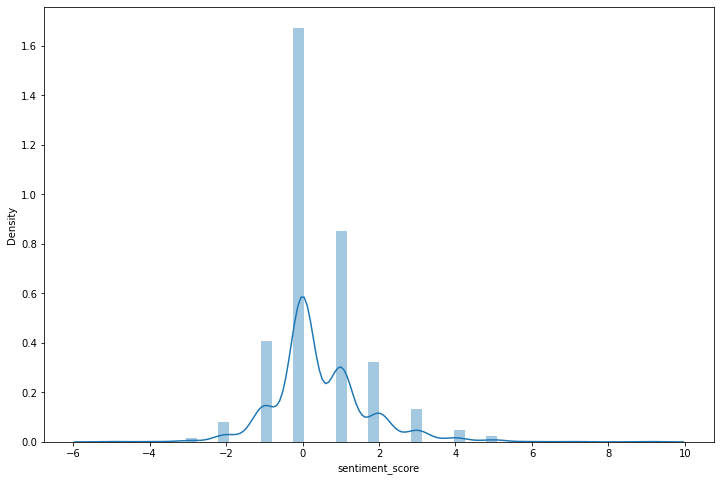

In [96]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(sentences_df["sentiment_score"])
plt.show()

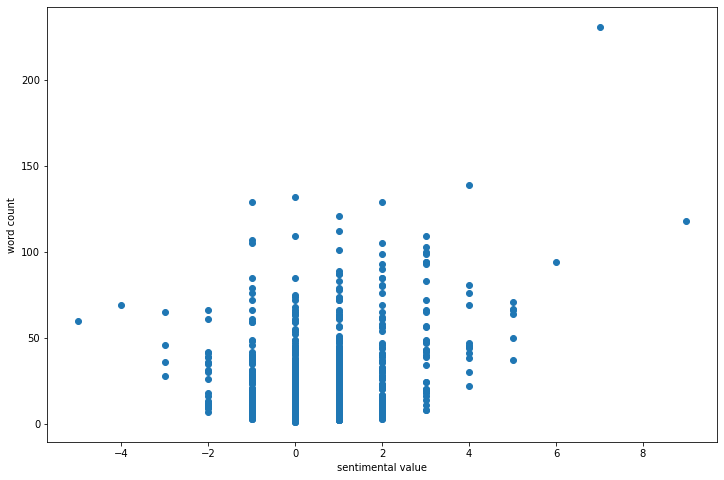

In [97]:
plt.figure(figsize=(12,8))
plt.scatter("sentiment_score","word_count",data=sentences_df)
plt.xlabel("sentimental value")
plt.ylabel("word count")
plt.show()